Here, we are gonna solve a problem with a real world dataset.The task is to:

**Use the provided building energy data to develop a model that can predict a building's Energy Star score, and then interpret the results to find the variables that are most predictive of the score.**

In this notebook, we'll carry out the first three steps of a machine learning problem:
1.   Clean the data
2.   Perform exploratory data analysis
3.   Feature engineering



### Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Data Cleaning and Formatting

### Load the data

In [2]:
data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Energy data/Energy_and_Water_Data_Disclosure_for_Local_Law_84_2017__Data_for_Calendar_Year_2016_.csv")
data.head()

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,...,Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
0,1,13286,201/205,13286,201/205,1013160001,1013160001,1037549,201/205 East 42nd st.,Not Available,...,619.4,05/01/2017 05:32:03 PM,No,In Compliance,40.750791,-73.973963,6.0,4.0,88.0,Turtle Bay-East Midtown ...
1,2,28400,NYP Columbia (West Campus),28400,NYP Columbia (West Campus),1021380040,1-02138-0040,1084198; 1084387;1084385; 1084386; 1084388; 10...,622 168th Street,Not Available,...,404.3,04/27/2017 11:23:27 AM,No,In Compliance,40.841402,-73.942568,12.0,10.0,251.0,Washington Heights South ...
2,3,4778226,MSCHoNY North,28400,NYP Columbia (West Campus),1021380030,1-02138-0030,1063380,3975 Broadway,Not Available,...,Not Available,04/27/2017 11:23:27 AM,No,In Compliance,40.840427,-73.940249,12.0,10.0,251.0,Washington Heights South ...
3,4,4778267,Herbert Irving Pavilion & Millstein Hospital,28400,NYP Columbia (West Campus),1021390001,1-02139-0001,1087281; 1076746,161 Fort Washington Ave,177 Fort Washington Ave,...,Not Available,04/27/2017 11:23:27 AM,No,In Compliance,40.840746,-73.942854,12.0,10.0,255.0,Washington Heights South ...
4,5,4778288,Neuro Institute,28400,NYP Columbia (West Campus),1021390085,1-02139-0085,1063403,710 West 168th Street,Not Available,...,Not Available,04/27/2017 11:23:27 AM,No,In Compliance,40.841559,-73.942528,12.0,10.0,255.0,Washington Heights South ...


### Data types and missing values

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 60 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Order                                                       11746 non-null  int64  
 1   Property Id                                                 11746 non-null  int64  
 2   Property Name                                               11746 non-null  object 
 3   Parent Property Id                                          11746 non-null  object 
 4   Parent Property Name                                        11746 non-null  object 
 5   BBL - 10 digits                                             11735 non-null  object 
 6   NYC Borough, Block and Lot (BBL) self-reported              11746 non-null  object 
 7   NYC Building Identification Number (BIN)                    11746 non-null  object 
 

A lot of numerical columns are recorded as object type here. One main problem causing that is there are a lot of "Not Available" value there. These columns with object data type will have to be converted to float type.

### Convert data types

In [4]:
data=data.replace({"Not Available": np.nan})

for col in list(data.columns):
   if ('ft²' in col or 'kBtu' in col or 'Metric Tons CO2e' in col or 'kWh' in 
        col or 'therms' in col or 'gal' in col or 'Score' in col):
     data[col] = data[col].astype(float)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 60 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Order                                                       11746 non-null  int64  
 1   Property Id                                                 11746 non-null  int64  
 2   Property Name                                               11746 non-null  object 
 3   Parent Property Id                                          11746 non-null  object 
 4   Parent Property Name                                        11746 non-null  object 
 5   BBL - 10 digits                                             11735 non-null  object 
 6   NYC Borough, Block and Lot (BBL) self-reported              11735 non-null  object 
 7   NYC Building Identification Number (BIN)                    11584 non-null  object 
 

### Missing values

In [6]:
data.isnull().sum()

Order                                                             0
Property Id                                                       0
Property Name                                                     0
Parent Property Id                                                0
Parent Property Name                                              0
BBL - 10 digits                                                  11
NYC Borough, Block and Lot (BBL) self-reported                   11
NYC Building Identification Number (BIN)                        162
Address 1 (self-reported)                                         0
Address 2                                                     11539
Postal Code                                                       0
Street Number                                                   124
Street Name                                                     122
Borough                                                         118
DOF Gross Floor Area                            

Almost all the columns have missing values. For this problem we'll drop the columns with 50% or more missing values.

In [7]:
for col in list(data.columns):
  if data[col].isnull().sum() > 5872:#(5872 is 50% of 11746,the size of the whole dataset)
    data.drop([col], axis=1, inplace=True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 49 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Order                                                       11746 non-null  int64  
 1   Property Id                                                 11746 non-null  int64  
 2   Property Name                                               11746 non-null  object 
 3   Parent Property Id                                          11746 non-null  object 
 4   Parent Property Name                                        11746 non-null  object 
 5   BBL - 10 digits                                             11735 non-null  object 
 6   NYC Borough, Block and Lot (BBL) self-reported              11735 non-null  object 
 7   NYC Building Identification Number (BIN)                    11584 non-null  object 
 

We had 60 columns, now we have 49 columns. So, 11 columns had more than 50% missing values and we dropped them.

The rest of the missing values will have to be imputed (filled-in) using an appropriate strategy before doing machine learning.

## Exploratory Data Analysis

Let's start by seeing the distribution of the score column.

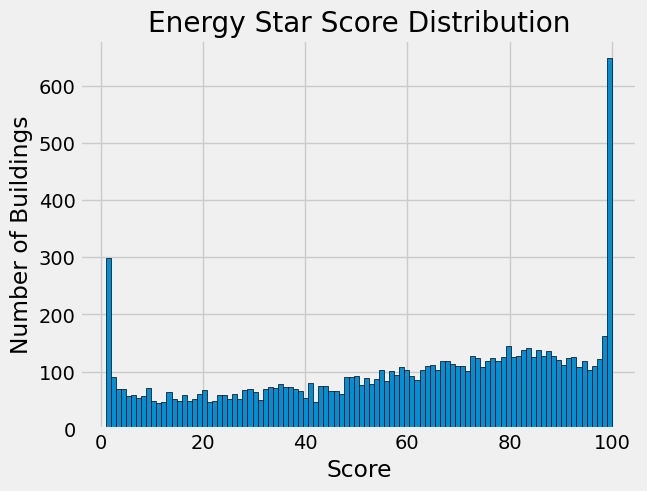

In [9]:
data=data.rename(columns= {"ENERGY STAR Score": "score"})

plt.style.use("fivethirtyeight")
plt.hist(data["score"].dropna(), bins=100, edgecolor="k")
plt.xlabel("Score");
plt.ylabel("Number of Buildings");
plt.title("Energy Star Score Distribution");

 We can see that the two most common scores, 1 and 100, make up a disproporationate number of the overall scores.

 If we go back to the definition of the score, we see it is based on self-reported energy usage. This poses a problem, because a building owner might be tempted to report lower electricity usage to artificially boost the score of their building. This behavior would explain the high percentage of buildings with a perfect score of 100, but does not explain why so many buildings score at the very bottom!

 To contrast the Energy Star Score, we can look at the Energy Use Intensity (EUI), which is the total energy use divided by the square footage of the building. Here the energy usage is not self-reported, so this could be a more objective measure of the energy efficiency of a building.

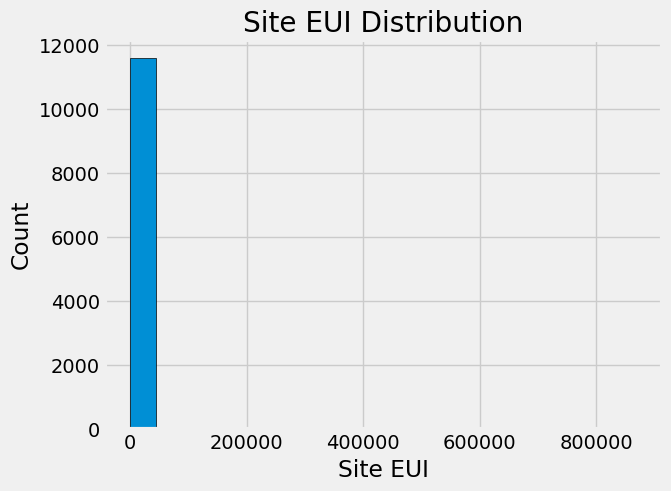

In [10]:
plt.hist(data["Site EUI (kBtu/ft²)"].dropna(), bins=20, edgecolor="k")
plt.xlabel("Site EUI");
plt.ylabel("Count");
plt.title("Site EUI Distribution");

The graph is very skewed because some buildings have very scores. So, we'll have to remove the outliers.Let's look at the stats of this feature.

In [11]:
data["Site EUI (kBtu/ft²)"].describe()

count     11583.000000
mean        280.071484
std        8607.178877
min           0.000000
25%          61.800000
50%          78.500000
75%          97.600000
max      869265.000000
Name: Site EUI (kBtu/ft²), dtype: float64

### Removing Outliers

We'll remove the outliers using the definition of extreme outlier:



1.   On the low end, an extreme outlier is:

  First Quartile - 3*Interquartile Range
2.   List item

  Third Quartile + 3*Interquartile Range






In [12]:
# Calculate first and third quartile
first_quartile = data['Site EUI (kBtu/ft²)'].describe()['25%']
third_quartile = data['Site EUI (kBtu/ft²)'].describe()['75%']

iqr = third_quartile - first_quartile

# Remove outliers
data = data[(data['Site EUI (kBtu/ft²)'] > (first_quartile - 3 * iqr)) &
            (data['Site EUI (kBtu/ft²)'] < (third_quartile + 3 * iqr))]

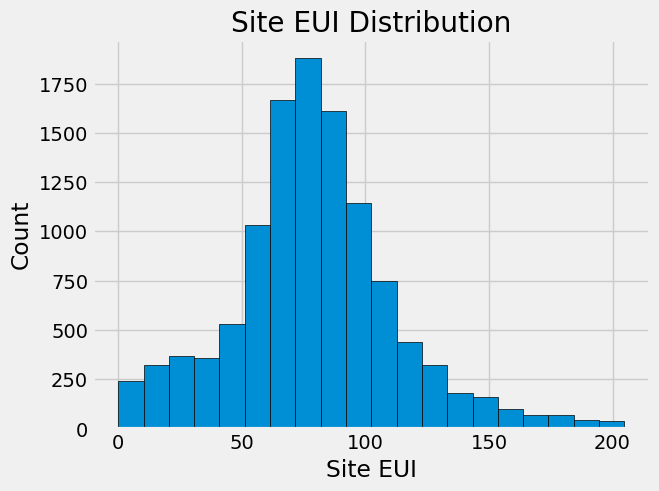

In [13]:
# Histogram Plot of Site EUI

plt.hist(data['Site EUI (kBtu/ft²)'].dropna(), bins = 20, edgecolor = 'black');
plt.xlabel('Site EUI'); 
plt.ylabel('Count'); 
plt.title('Site EUI Distribution');

Outliers removed. Let's get back to analysis.

### Looking for relationships

In order to look at the effect of categorical variables on the score, we can make a density plot colored by the value of the categorical variable. 

The first plot we will make shows the distribution of scores by the property type. In order to not clutter the plot, we will limit the graph to building types that have more than 100 observations in the dataset.



In [14]:
# Create a list of buildings with more than 100 measurements
types = data.dropna(subset=['score'])
types = types['Largest Property Use Type'].value_counts()
types = list(types[types.values > 100].index)

<ipython-input-15-2b5df4a51841>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['score'].dropna(),
<ipython-input-15-2b5df4a51841>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['score'].dropna(),
<ipython-input-15-2b5df4a51841>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['score'].dropna(),
<ipython-input-15-2b5df4a51841>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['score'].dropna(),


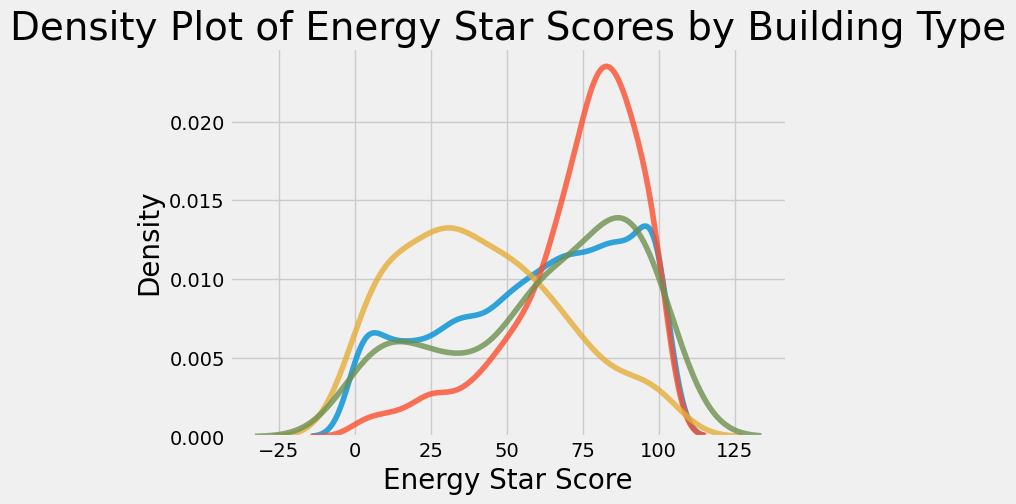

In [15]:
# Plot each building
for b_type in types:
    # Select the building type
    subset = data[data['Largest Property Use Type'] == b_type]
    
    # Density plot of Energy Star scores
    sns.kdeplot(subset['score'].dropna(),
               label = b_type, shade = False, alpha = 0.8);
    
# label the plot
plt.xlabel('Energy Star Score', size = 20); plt.ylabel('Density', size = 20); 
plt.title('Density Plot of Energy Star Scores by Building Type', size = 28);

We can see that the building type does have an effect on the score

To examine another categorical variable, borough, we can make the same graph, but this time colored by the borough.

In [16]:
# Create a list of boroughs with more than 100 observations
boroughs = data.dropna(subset=['score'])
boroughs = boroughs['Borough'].value_counts()
boroughs = list(boroughs[boroughs.values > 100].index)

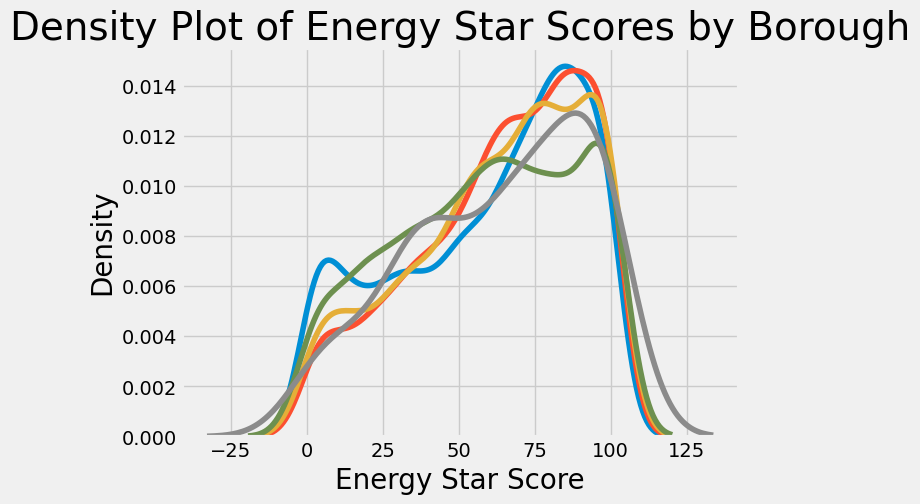

In [17]:
# Plot each borough distribution of scores
for borough in boroughs:
    # Select the building type
    subset = data[data['Borough'] == borough]
    
    # Density plot of Energy Star scores
    sns.kdeplot(subset['score'].dropna(),
               label = borough);
    
# label the plot
plt.xlabel('Energy Star Score', size = 20); plt.ylabel('Density', size = 20); 
plt.title('Density Plot of Energy Star Scores by Borough', size = 28);

It's clear that "Borough" does not have significant effect on score.

### Correlations

Let's see the correlation coefficients between all the variables and the score.

In [18]:
# Find all correlations and sort 
correlations_data = data.corr()['score'].sort_values()

# Print the most negative correlations
print(correlations_data.head(15), '\n')

# Print the most positive correlations
print(correlations_data.tail(15))

Site EUI (kBtu/ft²)                                          -0.723864
Weather Normalized Site EUI (kBtu/ft²)                       -0.713993
Weather Normalized Source EUI (kBtu/ft²)                     -0.645542
Source EUI (kBtu/ft²)                                        -0.641037
Weather Normalized Site Electricity Intensity (kWh/ft²)      -0.358394
Weather Normalized Site Natural Gas Intensity (therms/ft²)   -0.346046
Direct GHG Emissions (Metric Tons CO2e)                      -0.147792
Weather Normalized Site Natural Gas Use (therms)             -0.135211
Natural Gas Use (kBtu)                                       -0.133648
Year Built                                                   -0.121249
Total GHG Emissions (Metric Tons CO2e)                       -0.113136
Electricity Use - Grid Purchase (kBtu)                       -0.050639
Weather Normalized Site Electricity (kWh)                    -0.048207
Latitude                                                     -0.048196
Proper

<ipython-input-18-8ac398328a5b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations_data = data.corr()['score'].sort_values()


Site EUI (kBtu/ft²) , Weather Normalized Site EUI (kBtu/ft²) have the most negative correlations and Council District, Community Board have the most positive correlations.

To see if there's any non linear relationship we can take square root and natural log transformations of the features and then calculate the correlation coefficients with the score. To try and capture any possible relationships between the borough or building type (remember these are categorical variables) and the score we will have to one-hot encode these columns.

We will display the top 15 most positive and top 15 most negative correlations.

In [19]:
# Select the numeric columns
numeric_subset = data.select_dtypes('number')

# Create columns with square root and log of numeric columns
for col in numeric_subset.columns:
    # Skip the Energy Star Score column
    if col == 'score':
        next
    else:
        numeric_subset['sqrt_' + col] = np.sqrt(numeric_subset[col])
        numeric_subset['log_' + col] = np.log(numeric_subset[col])

# Select the categorical columns
categorical_subset = data[['Borough', 'Largest Property Use Type']]

# One hot encode
categorical_subset = pd.get_dummies(categorical_subset)

# Join the two dataframes using concat
# Make sure to use axis = 1 to perform a column bind
features = pd.concat([numeric_subset, categorical_subset], axis = 1)

# Drop buildings without an energy star score
features = features.dropna(subset = ['score'])

# Find correlations with the score 
correlations = features.corr()['score'].dropna().sort_values()

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = geta

In [20]:
# Display most negative correlations
correlations.head(15)

Site EUI (kBtu/ft²)                                            -0.723864
Weather Normalized Site EUI (kBtu/ft²)                         -0.713993
sqrt_Site EUI (kBtu/ft²)                                       -0.699817
sqrt_Weather Normalized Site EUI (kBtu/ft²)                    -0.689019
sqrt_Weather Normalized Source EUI (kBtu/ft²)                  -0.671044
sqrt_Source EUI (kBtu/ft²)                                     -0.669396
Weather Normalized Source EUI (kBtu/ft²)                       -0.645542
Source EUI (kBtu/ft²)                                          -0.641037
log_Source EUI (kBtu/ft²)                                      -0.622892
log_Weather Normalized Source EUI (kBtu/ft²)                   -0.620329
log_Site EUI (kBtu/ft²)                                        -0.612039
log_Weather Normalized Site EUI (kBtu/ft²)                     -0.601332
log_Weather Normalized Site Electricity Intensity (kWh/ft²)    -0.424246
sqrt_Weather Normalized Site Electricity Intensity 

In [21]:
# Display most positive correlations
correlations.tail(15)

sqrt_Order                                                         0.028662
Borough_Queens                                                     0.029545
Largest Property Use Type_Supermarket/Grocery Store                0.030038
Largest Property Use Type_Residence Hall/Dormitory                 0.035407
Order                                                              0.036827
Largest Property Use Type_Hospital (General Medical & Surgical)    0.048410
Borough_Brooklyn                                                   0.050486
log_Community Board                                                0.055495
Community Board                                                    0.056612
sqrt_Community Board                                               0.058029
sqrt_Council District                                              0.060623
log_Council District                                               0.061101
Council District                                                   0.061639
Largest Prop

After transforming the features, the strongest relationships are still those related to Energy Use Intensity (EUI). The log and square root transformations do not seem the have resulted in any stronger relationships. 

Now, let's graph the most significant correlation (in terms of absolute value) in the dataset which is Site EUI (kBtu/ft^2)

### Two-Variable Plots

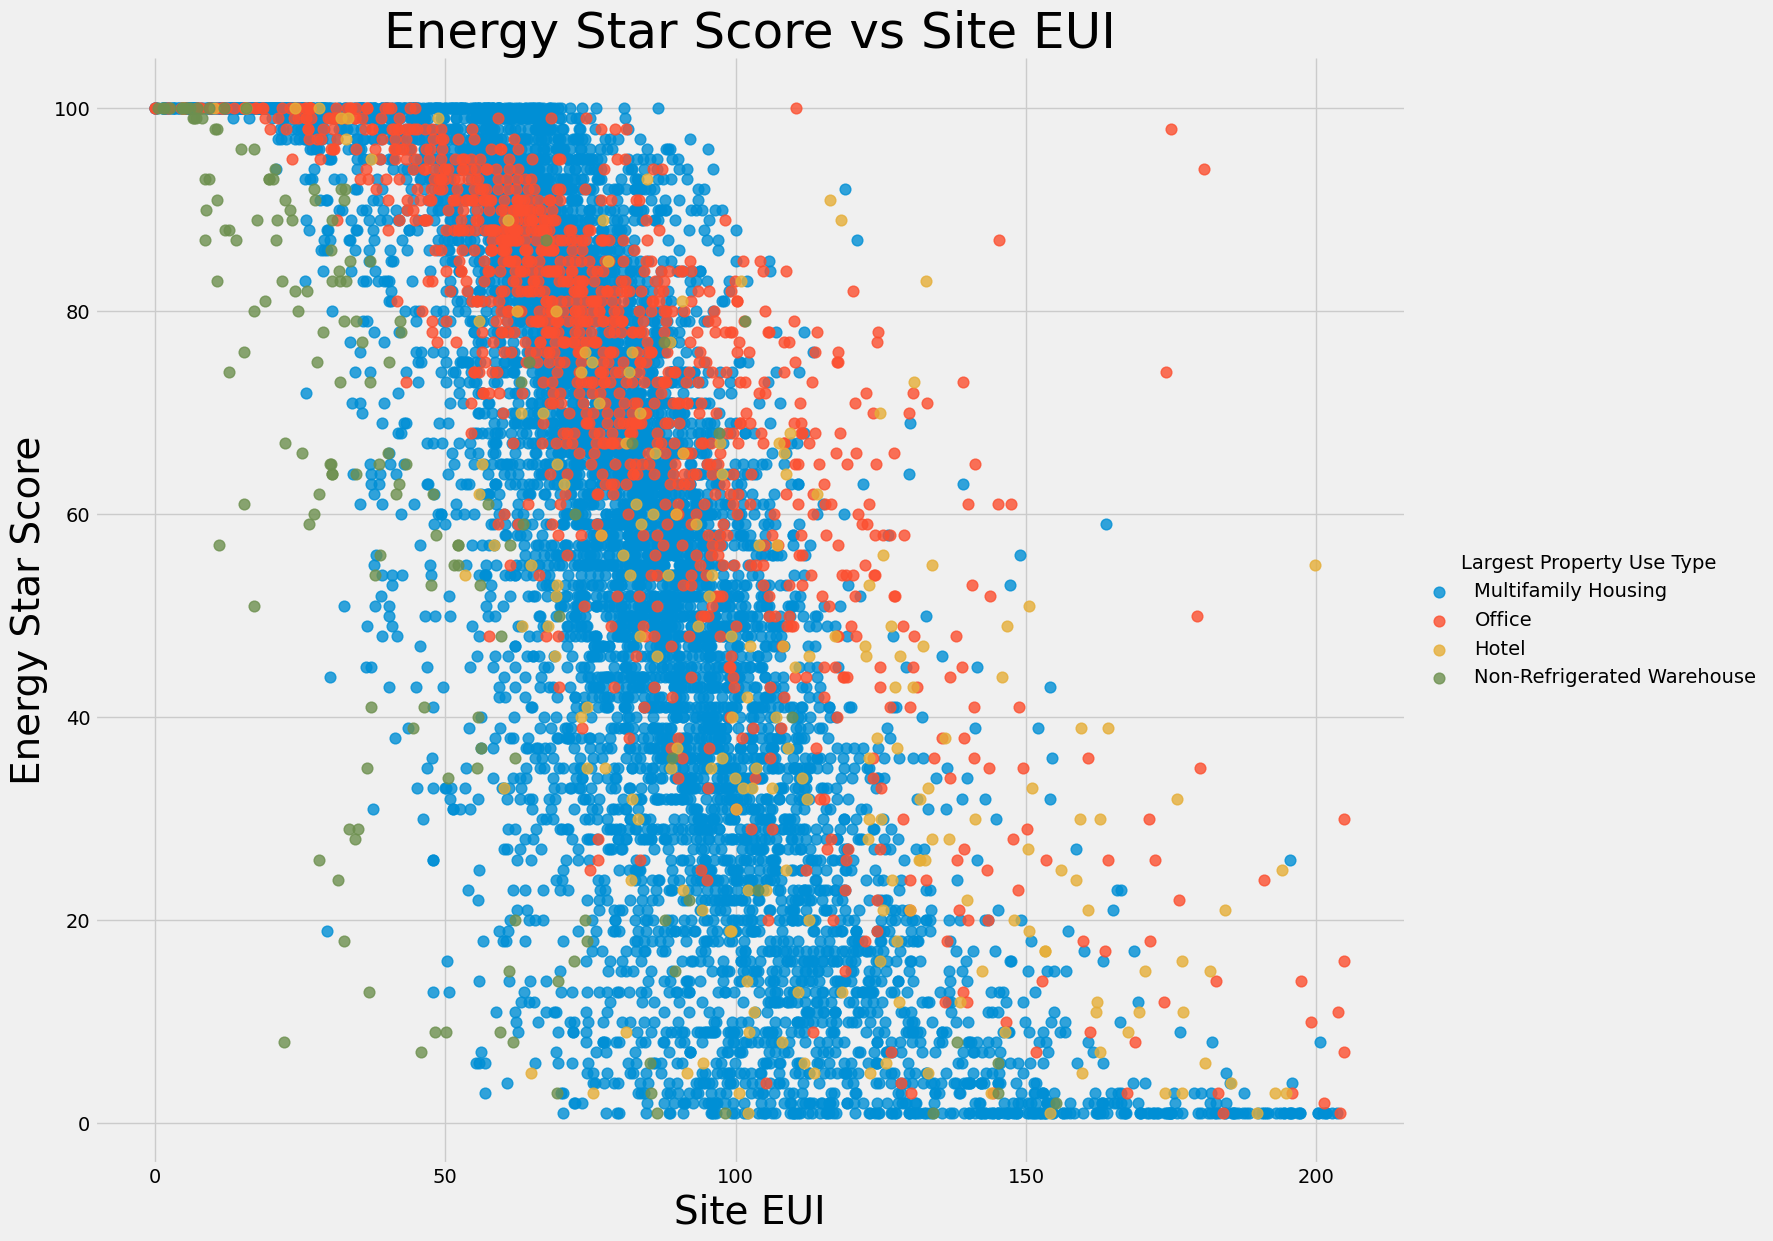

In [22]:
# Extract the building types
features['Largest Property Use Type'] = data.dropna(subset = ['score'])['Largest Property Use Type']

# Limit to building types with more than 100 observations (from previous code)
features = features[features['Largest Property Use Type'].isin(types)]

# Use seaborn to plot a scatterplot of Score vs Log Source EUI
sns.lmplot(data=features, x='Site EUI (kBtu/ft²)', y='score', 
           hue='Largest Property Use Type', 
           scatter_kws={'alpha': 0.8, 's': 60}, fit_reg=False,
           height=12, aspect=1.2)




# Plot labeling
plt.xlabel("Site EUI", size = 28)
plt.ylabel('Energy Star Score', size = 28)
plt.title('Energy Star Score vs Site EUI', size = 36);

There is a clear negative relationship between the Site EUI and the score. The relationship is not perfectly linear (it looks with a correlation coefficient of -0.7, but it does look like this feature will be important for predicting the score of a building.

### Pairs plot

Finally, we'll make a pairs plot between several different variables. The Pairs Plot is a great way to examine many variables at once as it shows scatterplots between pairs of variables and histograms of single variables on the diagonal.

Using the seaborn PairGrid function, we can map different plots on to the three aspects of the grid. The upper triangle will have scatterplots, the diagonal will show histograms, and the lower triangle will show both the correlation coefficient between two variables and a 2-D kernel density estimate of the two variables.

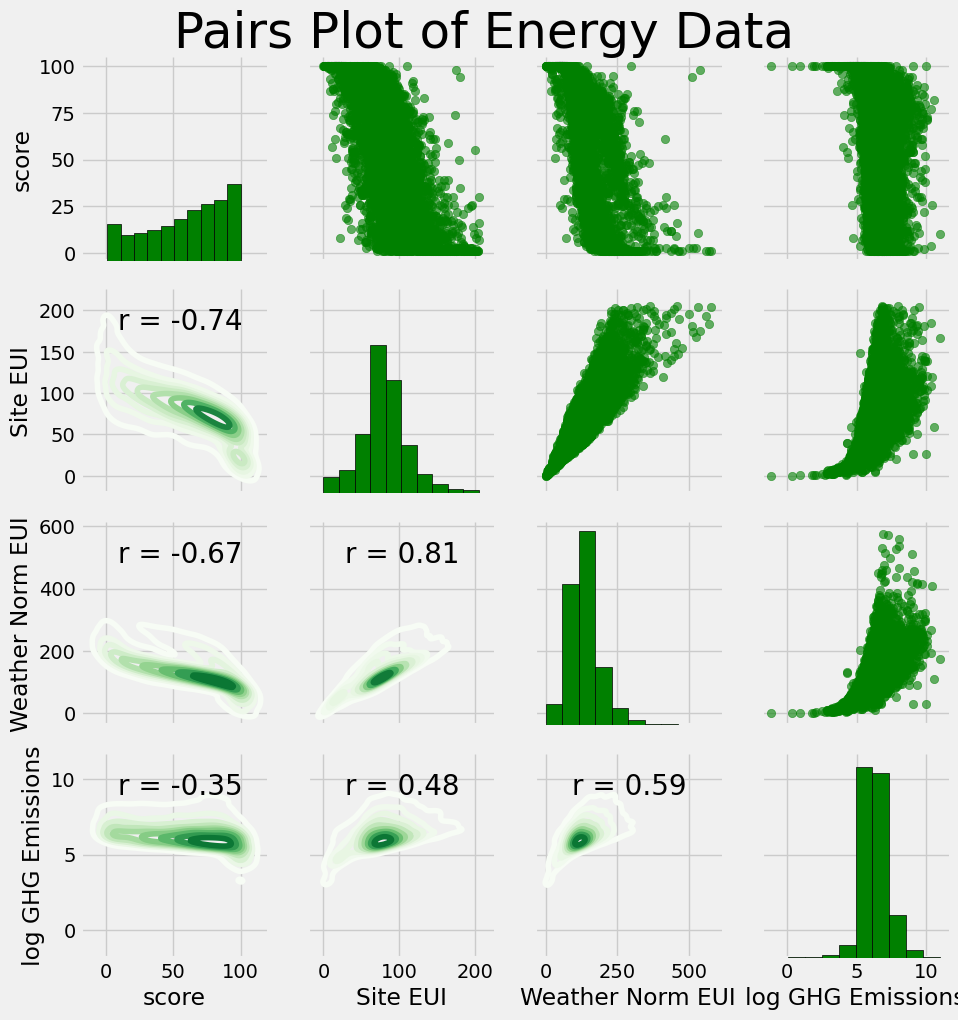

In [23]:
# Extract the columns to  plot
plot_data = features[['score', 'Site EUI (kBtu/ft²)', 
                      'Weather Normalized Source EUI (kBtu/ft²)', 
                      'log_Total GHG Emissions (Metric Tons CO2e)']]

# Replace the inf with nan
plot_data = plot_data.replace({np.inf: np.nan, -np.inf: np.nan})

# Rename columns 
plot_data = plot_data.rename(columns = {'Site EUI (kBtu/ft²)': 'Site EUI', 
                                        'Weather Normalized Source EUI (kBtu/ft²)': 'Weather Norm EUI',
                                        'log_Total GHG Emissions (Metric Tons CO2e)': 'log GHG Emissions'})

# Drop na values
plot_data = plot_data.dropna()

# Function to calculate correlation coefficient between two columns
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)

# Create the pairgrid object
grid = sns.PairGrid(data = plot_data)

# Upper is a scatter plot
grid.map_upper(plt.scatter, color = 'green', alpha = 0.6)

# Diagonal is a histogram
grid.map_diag(plt.hist, color = 'green', edgecolor = 'black')

# Bottom is correlation and density plot
grid.map_lower(corr_func);
grid.map_lower(sns.kdeplot, cmap='Greens')

# Title for entire plot
plt.suptitle('Pairs Plot of Energy Data', size = 36, y = 1.02);

## Feature Engineering and Selection

From EDA we've learned:



*   The score distribution varies by building type and to a lesser extent by borough. Although we will focus on numerical features, we should also include these two categorical features in the model.

*  Taking the log transformation of features does not result in significant increases in the linear correlations between features and the score.



Before we get any further, we should define what feature engineering and selection are! These definitions are informal and have considerable overlap



*   Feature Engineering: The process of taking raw data and extracting or creating new features that allow a machine learning model to learn a mapping beween these features and the target. This might mean taking transformations of variables, such as we did with the log and square root, or one-hot encoding categorical variables so they can be used in a model. Generally

*  Feature Selection: The process of choosing the most relevant features in your data. "Most relevant" can depend on many factors, but it might be something as simple as the highest correlation with the target, or the features with the most variance. 



Feature engineering and selection often has the highest returns on time invested in a machine learning problem. It can take quite a while to get right, but is often more important than the exact algorithm and hyperparameters used for the model. If we don't feed the model the correct data, then we are setting it up to fail and we should not expect it to learn!

In this project, we will take the following steps for feature engineering:


*   Select only the numerical variables and two categorical variables (borough and property use type)
*   Add in the log transformation of the numerical variables

*   One-hot encode the categorical variables






In [24]:
# let's see the shape of the data
data.shape

(11319, 49)

In [25]:
# copy the original data
features= data.copy()
features.shape

(11319, 49)

In [26]:
# Select the numeric columns
numeric_subset = data.select_dtypes('number')

# Create columns with log of numeric columns
for col in numeric_subset.columns:
    # Skip the Energy Star Score column
    if col == 'score':
        next
    else:
        numeric_subset['log_' + col] = np.log(numeric_subset[col])
        
# Select the categorical columns
categorical_subset = data[['Borough', 'Largest Property Use Type']]

# One hot encode
categorical_subset = pd.get_dummies(categorical_subset)

# Join the two dataframes using concat
# Make sure to use axis = 1 to perform a column bind
features = pd.concat([numeric_subset, categorical_subset], axis = 1)

features.shape

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = geta

(11319, 110)

At this point, we have 11319 observations (buildings) with 109 different features (one column is the score). Not all of these features are likely to be important for predicting the score, and several of these features are also redundant because they are highly correlated. We will deal with this second issue below.

### Feature Selection

#### Removing collinear features

Collinear features, also known as multicollinear features, refer to variables in a dataset that are highly correlated with each other. In other words, collinear features exhibit a strong linear relationship, meaning that they tend to move together in a similar pattern.

When two or more features are collinear, it implies that they are providing redundant or overlapping information to a predictive model. Removing one of the variables in these pairs of features can often help a machine learning model generalize and be more interpretable.



There are a number of methods for removing collinear features. We will use one that removes the collinear features based on a threshold we select for the correlation coefficients by removing one of the two features that are compared. We will use a threshold of 0.6 which removes one of a pair of features if the correlation coefficient between the features exceeds this value.

This code was taken from: https://stackoverflow.com/a/43104383

In [27]:
def remove_collinear_features(x, threshold):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model
        to generalize and improves the interpretability of the model.
        
    Inputs: 
        threshold: any features with correlations greater than this value are removed
    
    Output: 
        dataframe that contains only the non-highly-collinear features
    '''
    
    # Dont want to remove correlations between Energy Star Score
    y = x['score']
    x = x.drop(columns = ['score'])
    
    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            
            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                # print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns = drops)
    x = x.drop(columns = ['Weather Normalized Site EUI (kBtu/ft²)', 
                          'Water Use (All Water Sources) (kgal)',
                          'log_Water Use (All Water Sources) (kgal)',
                          'Largest Property Use Type - Gross Floor Area (ft²)'])
    
    # Add the score back in to the data
    x['score'] = y
               
    return x

In [28]:
# Remove the collinear features above a specified correlation coefficient
features = remove_collinear_features(features, 0.6);

In [29]:
# Remove any columns with all na values
features  = features.dropna(axis=1, how = 'all')
features.shape

(11319, 65)

Our final dataset now has 64 features (one of the columns is the target). This is still quite a few, but mostly it is because we have one-hot encoded the categorical variables. Moreover, while a large number of features may be problematic for models such as linear regression, models such as the random forest perform implicit feature selection and automatically determine which features are important during traning. There are other feature selection steps to take, but for now we will keep all the features we have and see how the model performs.

### Split Into Training and Testing Sets

In [30]:
# Extract the buildings with no score and the buildings with a score
no_score = features[features['score'].isna()]
score = features[features['score'].notnull()]

print(no_score.shape)
print(score.shape)

(1858, 65)
(9461, 65)


In [31]:
from sklearn.model_selection import train_test_split

# Separate out the features and targets
features = score.drop(columns='score')
targets = pd.DataFrame(score['score'])

# Replace the inf and -inf with nan (required for later imputation)
features = features.replace({np.inf: np.nan, -np.inf: np.nan})

# Split into 70% training and 30% testing set
x_train, x_test, y_train, y_test = train_test_split(features, targets, test_size = 0.3, random_state = 42)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6622, 64)
(2839, 64)
(6622, 1)
(2839, 1)


### Establish a Naive Baseline

It's important to establish a naive baseline before we beginning making machine learning models. If the models we build cannot outperform a naive guess then we might have to admit that machine learning is not suited for this problem. This could be because we are not using the right models, because we need more data, or because there is a simpler solution that does not require machine learning. Establishing a baseline is crucial so we do not end up building a machine learning model only to realize we can't actually solve the problem.

For a regression task, a good naive baseline is to predict the median value of the target on the training set for all examples on the test set. This is simple to implement and sets a relatively low bar for our models: if they cannot do better than guessing the medin value, then we will need to rethink our approach.

#### The goal is to develop models with lower error than a naive baseline,

###Metric: Mean Absolute Error

There are a number of metrics used in machine learning tasks and it can be difficult to know which one to choose. Most of the time it will depend on the particular problem and if you have a specific goal to optimize for. I like Andrew Ng's advice to use a single real-value performance metric in order to compare models because it simplifies the evaluate process. Rather than calculating multiple metrics and trying to determine how important each one is, we should use a single number. In this case, because we doing regression, the mean absolute error is an appropriate metric. This is also interpretable because it represents the average amount our estimate if off by in the same units as the target value.

In [32]:
# Function to calculate mean absolute error
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

In [33]:
baseline_guess = np.median(y_train)

print('The baseline guess is a score of %0.2f' % baseline_guess)
print("Baseline Performance on the test set: MAE = %0.4f" % mae(y_test, baseline_guess))

The baseline guess is a score of 66.00
Baseline Performance on the test set: MAE = 24.5164


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


#### So, we'll have to train a model that gives us error of less than 24.5164 percent.

### Download files to use in next notebook

In [43]:
x_train.to_csv("train_features.csv", index=False)
x_test.to_csv("test_features.csv", index=False)
y_train.to_csv("train_labels.csv", index=False)
y_test.to_csv("test_labels.csv", index=False)


In [ ]:
import os
os.listdir()

In [47]:
from google.colab import files

file_names = ["train_features.csv","test_features.csv","train_labels.csv","test_labels.csv"]

# Download each file
for file_name in file_names:
    files.download(file_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>